In [34]:
# imports
import os
import warnings
from pathlib import Path

import pandas as pd
import seaborn as sns
from astropy import units
from astropy.nddata import CCDData
from astropy.utils.exceptions import AstropyWarning
from rich import print
from tqdm import tqdm

In [5]:
# code configurations
# supporess fits warnings
warnings.filterwarnings("ignore", category=AstropyWarning, append=True)

# configure tqdm
bar_format = {"unit_scale": True,
              "unit": "Files",
              "colour": "green",
              "ascii": True,
              "ncols": 90}

# measurement file path definitions
measurement_file = Path("AstronomyResearchData",
                        "Measurements",
                        "V336Measurements.csv")
print(measurement_file, measurement_file.is_file())

AstronomyResearchData/Measurements/V336Measurements.csv True

In [14]:
# load the dataframe
measurement_df = pd.read_csv(measurement_file)
measurement_df

,Label,slice,Saturated,J.D.-2400000,JD_UTC,BJD_TDB,DATE-OBS,FWHM_Mean,Source_Radius,Sky_Rad(min),...,Source_SNR_C4,Peak_C4,Mean_C4,Sky/Pixel_C4,FWHM_C4,Width_C4,X-Width_C4,Y-Width_C4,Angle_C4,Roundness_C4
0,MED_1.fits,1,0,0,0,0,NaN,8.380531,12,21,...,323.378482,7250.318848,827.615745,1650.166459,8.426313,9.190976,8.962802,9.419150,57.916981,0.987033
1,MED_2.fits,2,0,0,0,0,NaN,9.009092,12,21,...,326.759061,6753.029297,798.953839,1475.576328,9.060416,9.005176,8.903657,9.106696,50.518983,0.986135
2,MED_3.fits,3,0,0,0,0,NaN,9.478114,12,21,...,347.716419,5964.926758,802.216514,1256.703259,9.553192,9.393212,9.165839,9.620585,58.135636,0.988051
3,MED_4.fits,4,0,0,0,0,NaN,9.359829,12,21,...,184.570051,5264.638672,507.249123,2261.124308,9.539514,9.676388,9.518268,9.834508,68.572434,0.998014
4,MED_5.fits,5,0,0,0,0,NaN,10.027591,12,21,...,116.639913,4905.207031,337.998456,2701.381632,9.995271,9.248488,9.213682,9.283293,47.904460,0.994470


In [12]:
print(measurement_df.columns)

Index(['Label', 'slice', 'Saturated', 'J.D.-2400000', 'JD_UTC', 'BJD_TDB',
       'DATE-OBS', 'FWHM_Mean', 'Source_Radius', 'Sky_Rad(min)',
       'Sky_Rad(max)', 'rel_flux_T1', 'rel_flux_C2', 'rel_flux_C3',
       'rel_flux_C4', 'rel_flux_err_T1', 'rel_flux_err_C2', 'rel_flux_err_C3',
       'rel_flux_err_C4', 'rel_flux_SNR_T1', 'rel_flux_SNR_C2',
       'rel_flux_SNR_C3', 'rel_flux_SNR_C4', 'tot_C_cnts', 'tot_C_err',
       'X(IJ)_T1', 'Y(IJ)_T1', 'X(FITS)_T1', 'Y(FITS)_T1', 'RA_T1', 'DEC_T1',
       'Source-Sky_T1', 'N_Src_Pixels_T1', 'Source_Error_T1', 'Source_SNR_T1',
       'Peak_T1', 'Mean_T1', 'Sky/Pixel_T1', 'N_Sky_Pixels_T1', 'FWHM_T1',
       'Width_T1', 'X-Width_T1', 'Y-Width_T1', 'Angle_T1', 'Roundness_T1',
       'X(IJ)_C2', 'Y(IJ)_C2', 'X(FITS)_C2', 'Y(FITS)_C2', 'RA_C2', 'DEC_C2',
       'Source-Sky_C2', 'Source_Error_C2', 'Source_SNR_C2', 'Peak_C2',
       'Mean_C2', 'Sky/Pixel_C2', 'FWHM_C2', 'Width_C2', 'X-Width_C2',
       'Y-Width_C2', 'Angle_C2', 'Roundness_C2', 'X(IJ)_C3', 'Y(IJ)_C3',
       'X(FITS)_C3', 'Y(FITS)_C3', 'RA_C3', 'DEC_C3', 'Source-Sky_C3',
       'Source_Error_C3', 'Source_SNR_C3', 'Peak_C3', 'Mean_C3',
       'Sky/Pixel_C3', 'FWHM_C3', 'Width_C3', 'X-Width_C3', 'Y-Width_C3',
       'Angle_C3', 'Roundness_C3', 'X(IJ)_C4', 'Y(IJ)_C4', 'X(FITS)_C4',
       'Y(FITS)_C4', 'RA_C4', 'DEC_C4', 'Source-Sky_C4', 'Source_Error_C4',
       'Source_SNR_C4', 'Peak_C4', 'Mean_C4', 'Sky/Pixel_C4', 'FWHM_C4',
       'Width_C4', 'X-Width_C4', 'Y-Width_C4', 'Angle_C4', 'Roundness_C4'],
      dtype='object')

In [44]:
# remove the columns that dont matter
norm_flux_df = measurement_df[["JD_UTC",
                               "Source-Sky_T1",
                               "rel_flux_T1",
                               "rel_flux_C4",
                               "rel_flux_C2",
                               "rel_flux_C3"]]

# # add the normalized flux column
# max_flux = norm_flux_df["Source-Sky_T1"].max()
# norm_flux_df["norm_flux"] = norm_flux_df.apply(
#     lambda row : row["Source-Sky_T1"] / max_flux,
#     axis=1)

# add times "manually"
norm_flux_df["JD_UTC"] = [
    0.77293944,
    0.81190037,
    0.8441351,
    0.84838569,
    0.90050707
]

# 2460089.77293944
# 2460089.81190037
# 2460089.8441351
# 2460089.84838569
# 2460089.90050707

norm_flux_df

/var/folders/5d/bvscdv6j3d71wbxsvd8zwbs80000gn/T/ipykernel_12190/2905261445.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_flux_df["JD_UTC"] = [


,JD_UTC,Source-Sky_T1,rel_flux_T1,rel_flux_C4,rel_flux_C2,rel_flux_C3
0,0.772939,651718.897612,0.331815,0.235912,1.338456,0.310190
1,0.811900,539243.571590,0.283669,0.235806,1.347207,0.307577
2,0.844135,597759.028118,0.312853,0.235509,1.337398,0.310976
3,0.848386,370215.090512,0.308746,0.237707,1.337740,0.308402
4,0.900507,236382.372552,0.290258,0.230914,1.341770,0.314807


<Axes: xlabel='JD_UTC', ylabel='rel_flux_C4'>

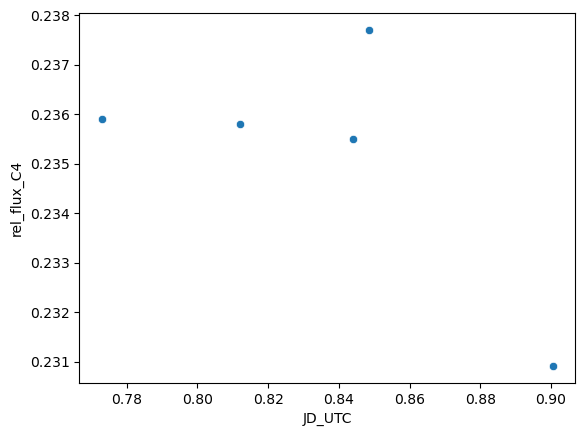

In [47]:
# plot w/matplotlib
sns.scatterplot(data=norm_flux_df, x="JD_UTC", y="rel_flux_C4")